In [1]:
# Imports.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

tfd = tf.contrib.distributions

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
# Model & Plotting.

neurons = 256

# Encoder.
def make_encoder(data, code_size):
    x = tf.layers.flatten(data)
    h1 = tf.layers.dense(x, neurons, tf.nn.relu)
    h2 = tf.layers.dense(h1, neurons, tf.nn.relu)
    loc = tf.layers.dense(h2, code_size, tf.nn.tanh)
    scl = tf.layers.dense(h2, code_size, tf.nn.softplus)
    return tfd.MultivariateNormalDiag(loc, scl)

# Prior.
def make_prior(code_size):
    loc = tf.zeros(code_size)
    scl = tf.ones(code_size)
    return tfd.MultivariateNormalDiag(loc, scl)

# Decoder
def make_decoder(code, data_shape):
    x = code
    h1 = tf.layers.dense(x, neurons, tf.nn.relu)
    h2 = tf.layers.dense(h1, neurons, tf.nn.relu)
    loc = tf.layers.dense(h2, np.prod(data_shape), tf.nn.softplus)
    scl = tf.layers.dense(h2, np.prod(data_shape), tf.nn.softplus)
    
    return loc, scl

# Optimisation
make_encoder = tf.make_template('encoder', make_encoder)
make_decoder = tf.make_template('decoder', make_decoder)

In [3]:
# Dataset retrieval.
X_train = np.load('FireEvac_train_set.npy')
X_test = np.load('FireEvac_test_set.npy')

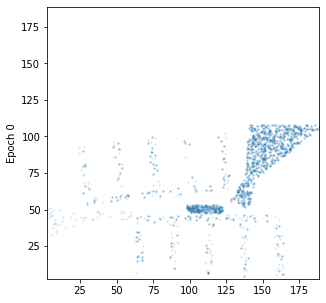

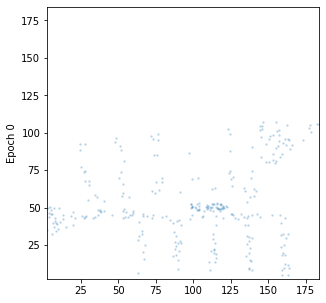

In [4]:
# Plotting.
def plot(epoch, codes, size=2):
    ig, ax = plt.subplots(ncols=1, figsize=(size, size))
    no_ticks = dict(left='off', bottom='off', labelleft='off', labelbottom='off')
    ax.set_ylabel('Epoch {}'.format(epoch))
    ax.scatter(codes[:, 0], codes[:, 1], s=2, alpha=0.1)
    ax.set_aspect('equal')
    ax.set_xlim(codes.min() - .1, codes.max() + .1)
    ax.set_ylim(codes.min() - .1, codes.max() + .1)
    ax.tick_params(axis='both', which='both', **no_ticks)
    plt.show()
    
plot(0, X_train, size=5)
plot(0, X_test, size=5)

In [5]:
data = tf.placeholder(tf.float32, [None, 2])

cs = 500

# Define the model.
prior = make_prior(code_size=cs)
posterior = make_encoder(data, code_size=cs)
code = posterior.sample()

# Define the loss.
loc, scl = make_decoder(code, [2])

mvn = tfd.Independent(tfd.MultivariateNormalDiag(loc, scl))
likelihood = mvn.log_prob(data)

divergence = tfd.kl_divergence(posterior, prior)
elbo = tf.reduce_mean(likelihood - .5*divergence)
optimize = tf.train.AdamOptimizer(0.001).minimize(-elbo)

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlo

Epoch 0 elbo -14194797000.0


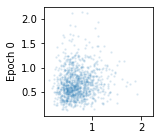

Reconstruction:


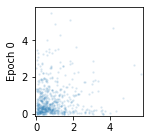

Epoch 1 elbo -59.74566


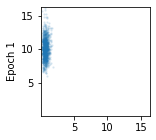

Reconstruction:


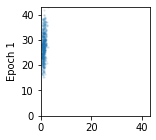

Epoch 2 elbo -37.07188


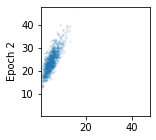

Reconstruction:


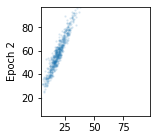

Epoch 3 elbo -21.881834


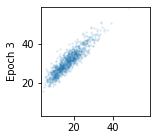

Reconstruction:


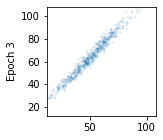

Epoch 4 elbo -17.277113


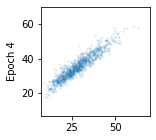

Reconstruction:


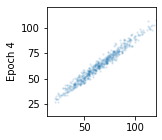

Epoch 5 elbo -15.145558


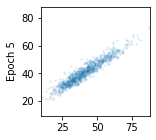

Reconstruction:


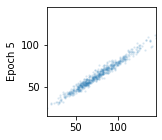

Epoch 6 elbo -13.938587


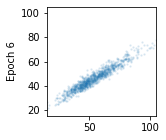

Reconstruction:


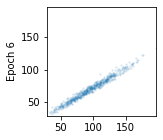

Epoch 7 elbo -12.833685


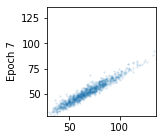

Reconstruction:


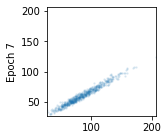

Epoch 8 elbo -12.382355


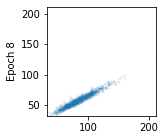

Reconstruction:


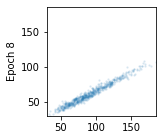

Epoch 9 elbo -11.836383


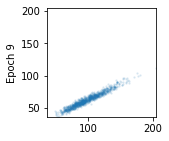

Reconstruction:


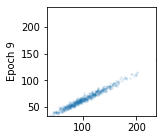

Epoch 10 elbo -12.056003


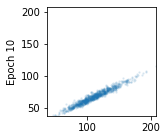

Reconstruction:


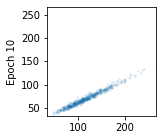

Epoch 11 elbo -11.673314


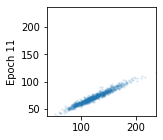

Reconstruction:


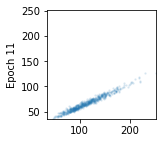

Epoch 12 elbo -11.838043


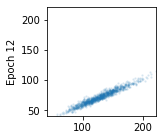

Reconstruction:


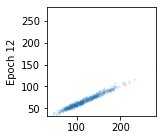

Epoch 13 elbo -11.722165


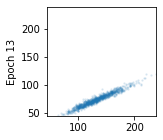

Reconstruction:


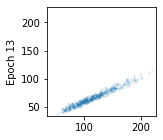

Epoch 14 elbo -11.745339


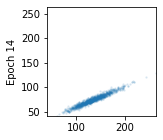

Reconstruction:


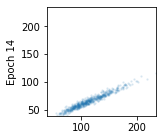

Epoch 15 elbo -11.678918


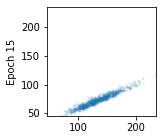

Reconstruction:


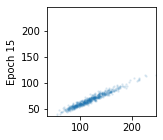

Epoch 16 elbo -11.673684


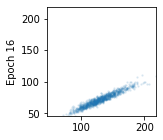

Reconstruction:


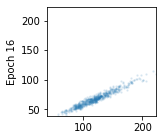

Epoch 17 elbo -11.603939


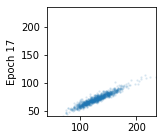

Reconstruction:


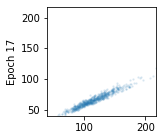

Epoch 18 elbo -11.805233


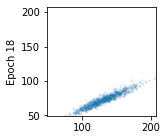

Reconstruction:


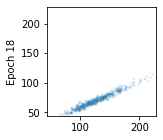

Epoch 19 elbo -11.686227


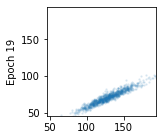

Reconstruction:


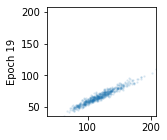

Epoch 20 elbo -11.556786


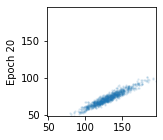

Reconstruction:


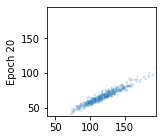

Epoch 21 elbo -11.459855


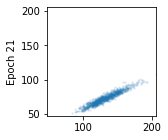

Reconstruction:


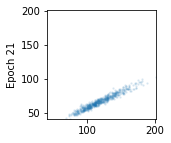

Epoch 22 elbo -11.681674


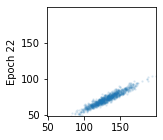

Reconstruction:


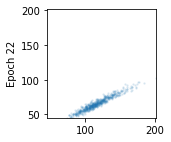

Epoch 23 elbo -11.496146


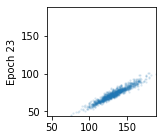

Reconstruction:


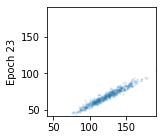

Epoch 24 elbo -11.532501


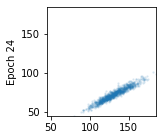

Reconstruction:


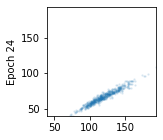

Epoch 25 elbo -11.62034


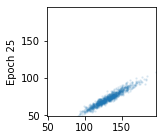

Reconstruction:


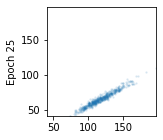

Epoch 26 elbo -11.537739


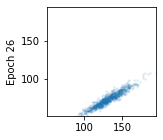

Reconstruction:


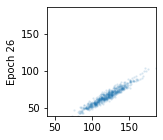

Epoch 27 elbo -11.709242


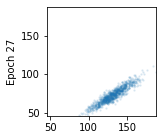

Reconstruction:


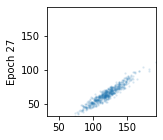

Epoch 28 elbo -11.692491


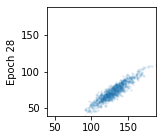

Reconstruction:


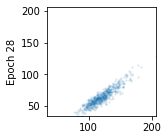

Epoch 29 elbo -11.503584


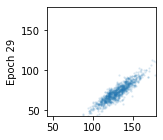

Reconstruction:


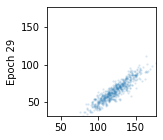

Epoch 30 elbo -11.591028


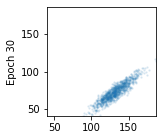

Reconstruction:


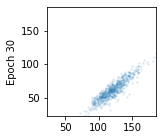

Epoch 31 elbo -11.575369


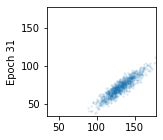

Reconstruction:


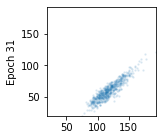

Epoch 32 elbo -11.3839855


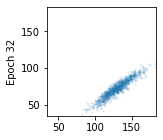

Reconstruction:


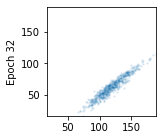

Epoch 33 elbo -11.040634


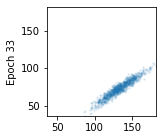

Reconstruction:


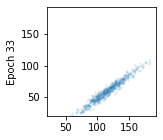

Epoch 34 elbo -11.102783


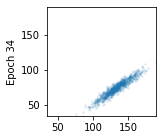

Reconstruction:


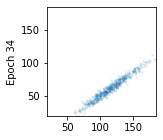

Epoch 35 elbo -11.115578


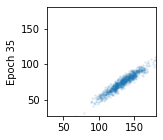

Reconstruction:


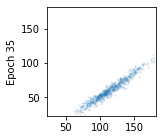

Epoch 36 elbo -11.070926


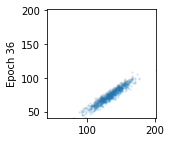

Reconstruction:


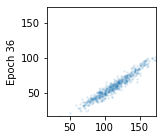

Epoch 37 elbo -10.940058


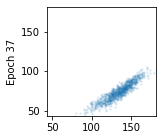

Reconstruction:


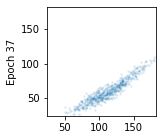

Epoch 38 elbo -10.950214


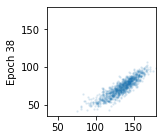

Reconstruction:


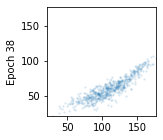

Epoch 39 elbo -10.811368


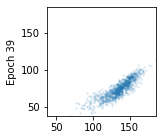

Reconstruction:


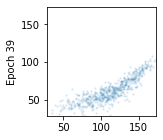

Epoch 40 elbo -10.593047


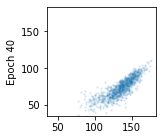

Reconstruction:


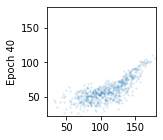

Epoch 41 elbo -10.814792


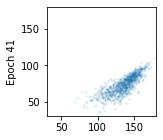

Reconstruction:


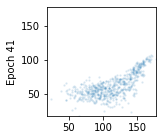

Epoch 42 elbo -10.616691


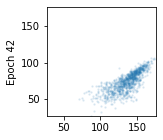

Reconstruction:


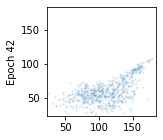

Epoch 43 elbo -10.50799


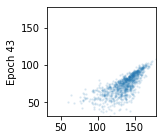

Reconstruction:


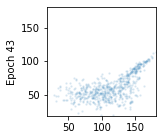

Epoch 44 elbo -10.502633


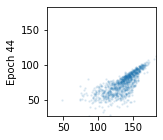

Reconstruction:


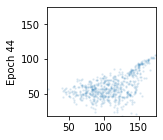

Epoch 45 elbo -10.482159


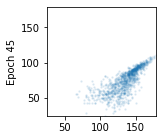

Reconstruction:


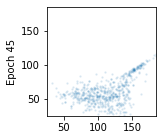

Epoch 46 elbo -10.343064


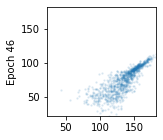

Reconstruction:


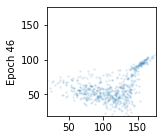

Epoch 47 elbo -10.25377


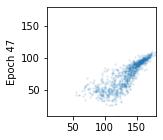

Reconstruction:


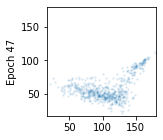

Epoch 48 elbo -10.128846


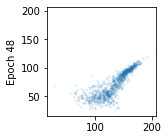

Reconstruction:


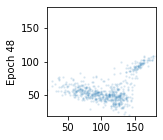

Epoch 49 elbo -10.087067


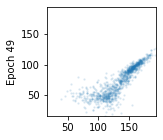

Reconstruction:


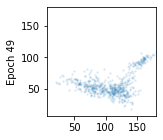

Epoch 50 elbo -10.110958


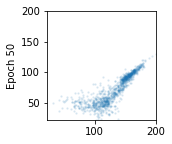

Reconstruction:


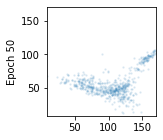

Epoch 51 elbo -10.040861


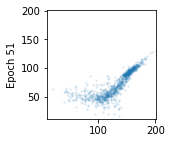

Reconstruction:


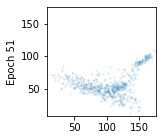

Epoch 52 elbo -10.015259


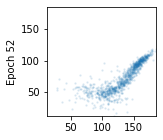

Reconstruction:


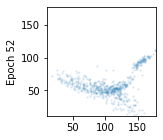

Epoch 53 elbo -10.097836


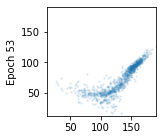

Reconstruction:


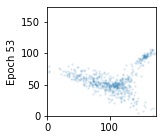

Epoch 54 elbo -9.944753


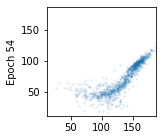

Reconstruction:


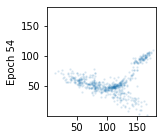

Epoch 55 elbo -9.884057


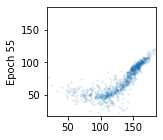

Reconstruction:


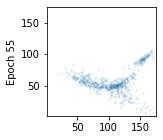

Epoch 56 elbo -10.015547


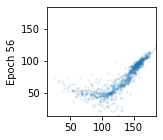

Reconstruction:


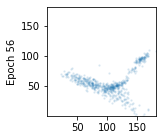

Epoch 57 elbo -10.299178


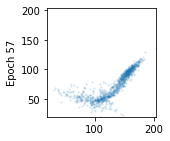

Reconstruction:


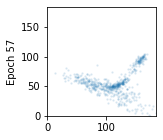

Epoch 58 elbo -9.80383


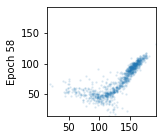

Reconstruction:


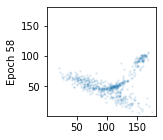

Epoch 59 elbo -9.832437


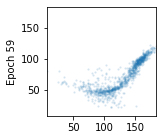

Reconstruction:


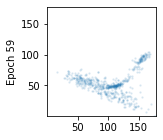

Epoch 60 elbo -9.801597


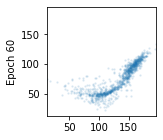

Reconstruction:


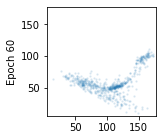

Epoch 61 elbo -10.127266


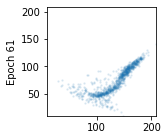

Reconstruction:


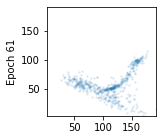

Epoch 62 elbo -9.795329


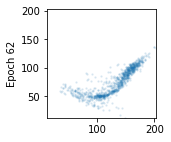

Reconstruction:


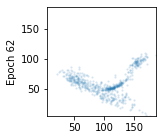

Epoch 63 elbo -9.763714


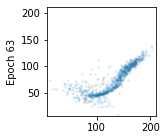

Reconstruction:


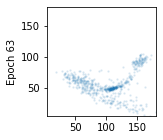

Epoch 64 elbo -11.492049


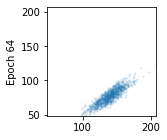

Reconstruction:


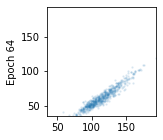

Epoch 65 elbo -11.260283


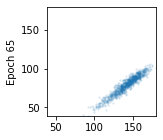

Reconstruction:


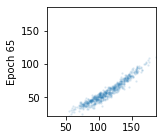

Epoch 66 elbo -11.154498


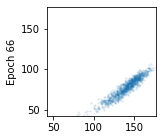

Reconstruction:


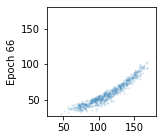

Epoch 67 elbo -11.036823


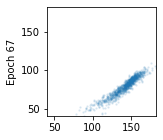

Reconstruction:


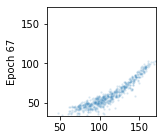

Epoch 68 elbo -10.829877


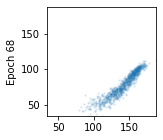

Reconstruction:


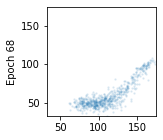

Epoch 69 elbo -10.452119


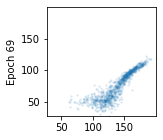

Reconstruction:


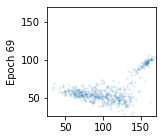

Epoch 70 elbo -10.291051


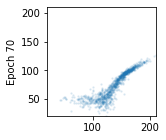

Reconstruction:


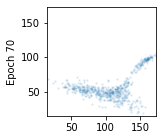

Epoch 71 elbo -10.278272


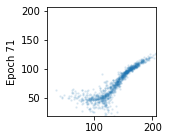

Reconstruction:


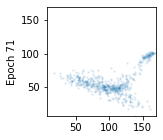

Epoch 72 elbo -10.279261


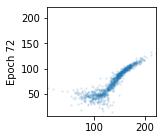

Reconstruction:


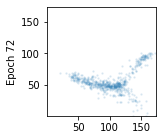

Epoch 73 elbo -10.080747


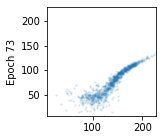

Reconstruction:


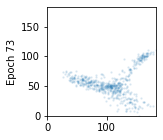

Epoch 74 elbo -10.061556


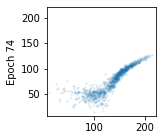

Reconstruction:


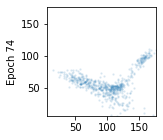

Epoch 75 elbo -10.092329


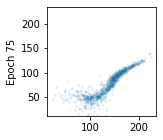

Reconstruction:


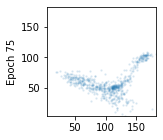

Epoch 76 elbo -9.960617


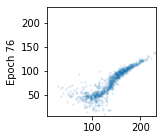

Reconstruction:


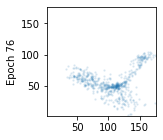

Epoch 77 elbo -9.796272


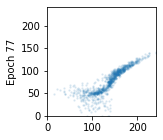

Reconstruction:


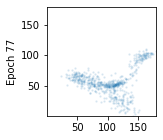

Epoch 78 elbo -9.957023


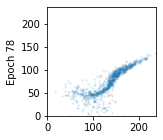

Reconstruction:


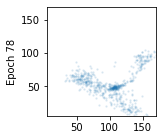

Epoch 79 elbo -9.756634


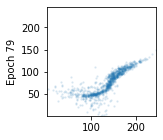

Reconstruction:


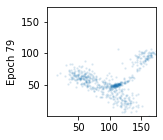

Epoch 80 elbo -10.070785


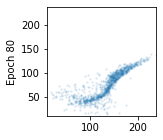

Reconstruction:


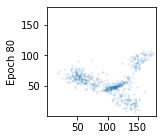

Epoch 81 elbo -9.638383


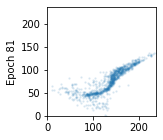

Reconstruction:


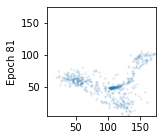

Epoch 82 elbo -9.928055


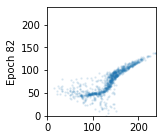

Reconstruction:


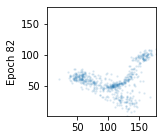

Epoch 83 elbo -9.650566


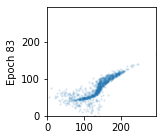

Reconstruction:


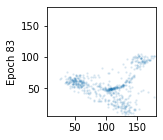

Epoch 84 elbo -9.555671


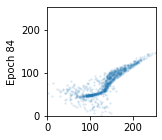

Reconstruction:


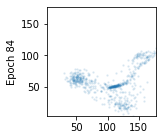

Epoch 85 elbo -9.628504


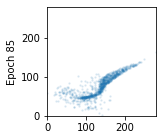

Reconstruction:


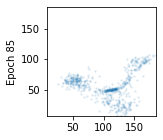

Epoch 86 elbo -9.67129


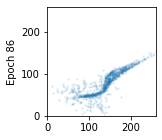

Reconstruction:


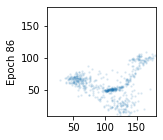

Epoch 87 elbo -9.640484


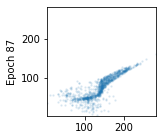

Reconstruction:


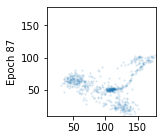

Epoch 88 elbo -9.602293


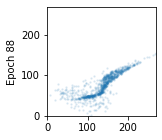

Reconstruction:


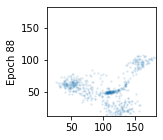

Epoch 89 elbo -9.621359


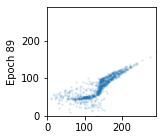

Reconstruction:


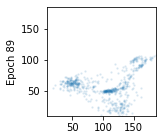

Epoch 90 elbo -9.4728365


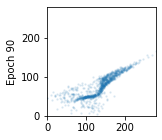

Reconstruction:


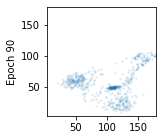

Epoch 91 elbo -9.719874


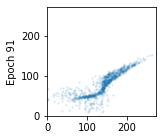

Reconstruction:


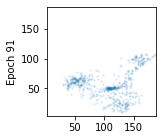

Epoch 92 elbo -9.476374


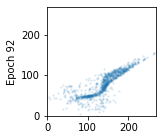

Reconstruction:


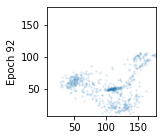

Epoch 93 elbo -9.598002


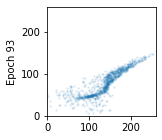

Reconstruction:


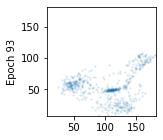

Epoch 94 elbo -9.547436


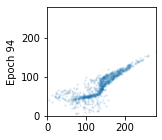

Reconstruction:


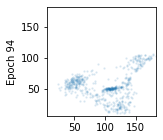

Epoch 95 elbo -9.530768


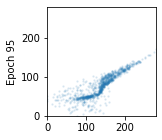

Reconstruction:


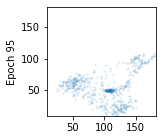

Epoch 96 elbo -9.456043


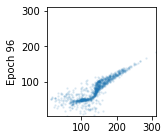

Reconstruction:


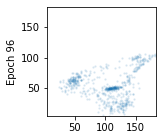

Epoch 97 elbo -9.529635


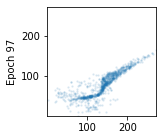

Reconstruction:


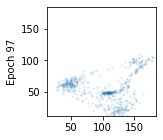

Epoch 98 elbo -9.530402


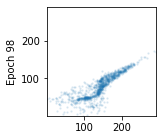

Reconstruction:


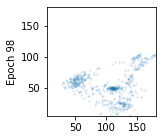

Epoch 99 elbo -9.555101


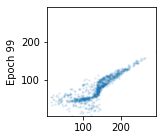

Reconstruction:


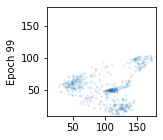

Epoch 100 elbo -9.547371


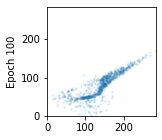

Reconstruction:


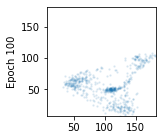

Epoch 101 elbo -9.434928


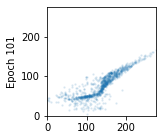

Reconstruction:


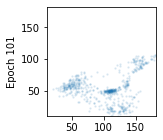

Epoch 102 elbo -9.438942


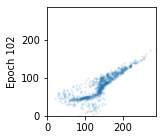

Reconstruction:


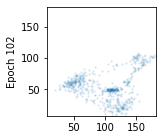

Epoch 103 elbo -9.402988


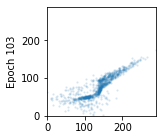

Reconstruction:


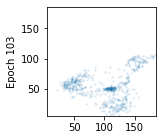

Epoch 104 elbo -9.40617


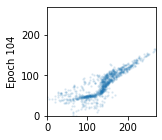

Reconstruction:


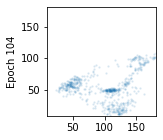

Epoch 105 elbo -9.556962


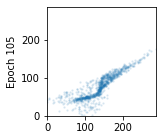

Reconstruction:


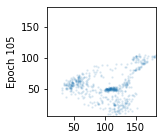

Epoch 106 elbo -9.381307


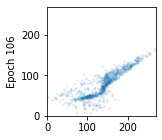

Reconstruction:


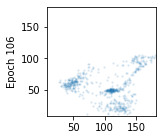

Epoch 107 elbo -9.34291


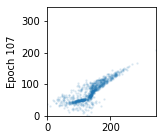

Reconstruction:


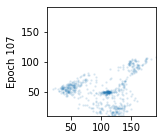

Epoch 108 elbo -9.531342


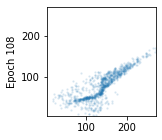

Reconstruction:


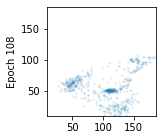

Epoch 109 elbo -9.446388


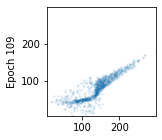

Reconstruction:


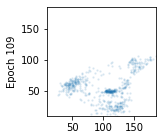

Epoch 110 elbo -9.470617


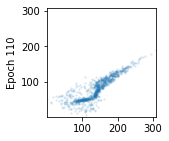

Reconstruction:


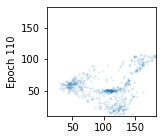

Epoch 111 elbo -9.460506


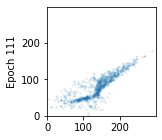

Reconstruction:


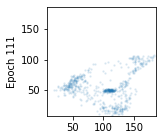

Epoch 112 elbo -9.440962


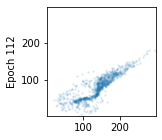

Reconstruction:


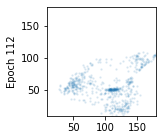

Epoch 113 elbo -9.298788


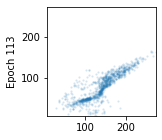

Reconstruction:


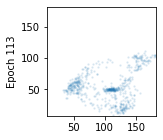

Epoch 114 elbo -9.433411


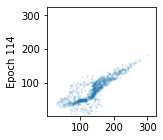

Reconstruction:


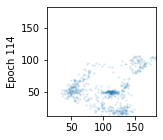

Epoch 115 elbo -9.219681


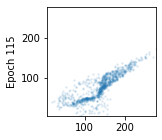

Reconstruction:


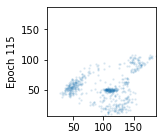

Epoch 116 elbo -9.267898


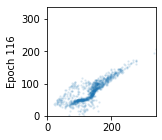

Reconstruction:


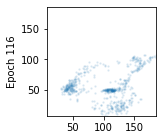

Epoch 117 elbo -9.305194


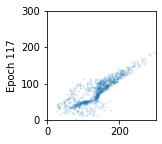

Reconstruction:


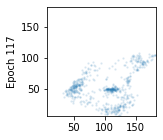

Epoch 118 elbo -9.333687


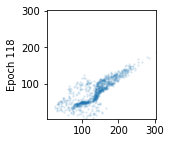

Reconstruction:


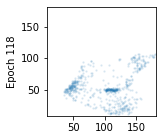

Epoch 119 elbo -9.232687


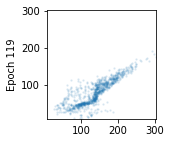

Reconstruction:


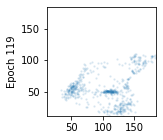

Epoch 120 elbo -9.427594


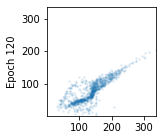

Reconstruction:


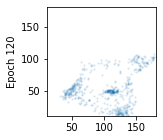

Epoch 121 elbo -9.267149


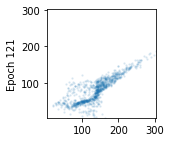

Reconstruction:


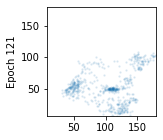

Epoch 122 elbo -9.816633


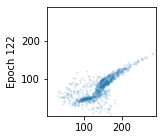

Reconstruction:


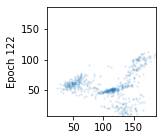

Epoch 123 elbo -9.257475


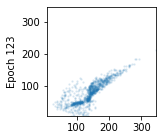

Reconstruction:


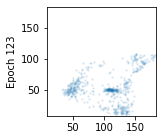

Epoch 124 elbo -9.232905


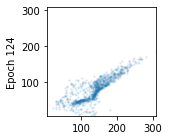

Reconstruction:


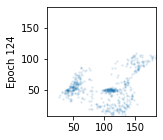

Epoch 125 elbo -9.272387


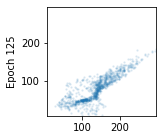

Reconstruction:


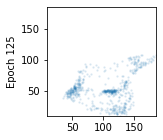

Epoch 126 elbo -9.29138


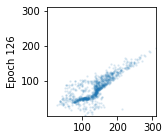

Reconstruction:


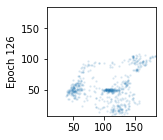

Epoch 127 elbo -9.215166


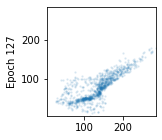

Reconstruction:


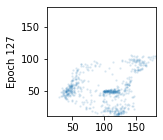

Epoch 128 elbo -9.092743


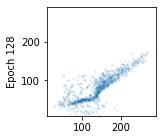

Reconstruction:


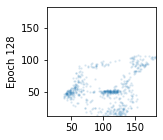

Epoch 129 elbo -9.020575


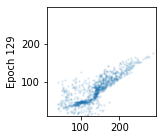

Reconstruction:


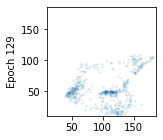

Epoch 130 elbo -9.148081


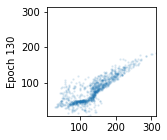

Reconstruction:


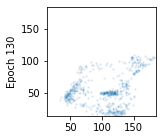

Epoch 131 elbo -9.171117


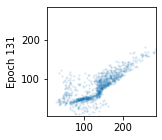

Reconstruction:


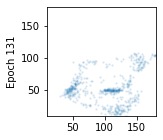

Epoch 132 elbo -9.367191


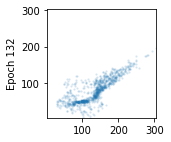

Reconstruction:


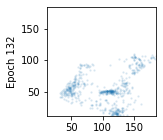

Epoch 133 elbo -9.0628195


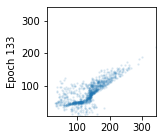

Reconstruction:


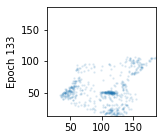

Epoch 134 elbo -9.113767


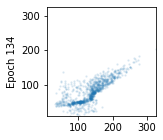

Reconstruction:


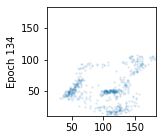

Epoch 135 elbo -9.086834


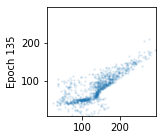

Reconstruction:


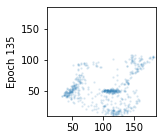

Epoch 136 elbo -9.164148


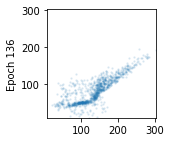

Reconstruction:


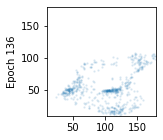

Epoch 137 elbo -9.041981


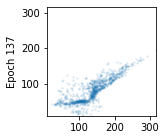

Reconstruction:


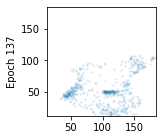

Epoch 138 elbo -9.091914


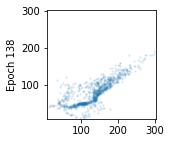

Reconstruction:


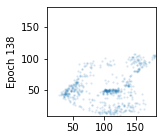

Epoch 139 elbo -8.995205


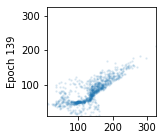

Reconstruction:


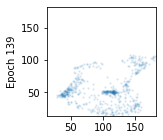

Epoch 140 elbo -8.987703


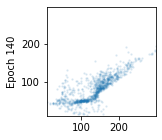

Reconstruction:


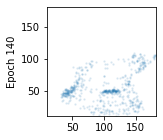

Epoch 141 elbo -9.097214


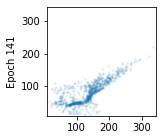

Reconstruction:


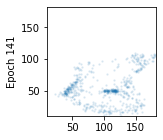

Epoch 142 elbo -8.97633


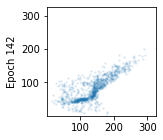

Reconstruction:


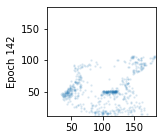

Epoch 143 elbo -8.852694


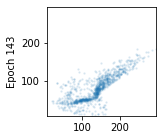

Reconstruction:


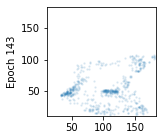

Epoch 144 elbo -8.917607


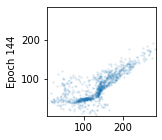

Reconstruction:


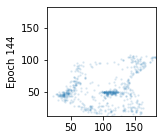

Epoch 145 elbo -8.9955015


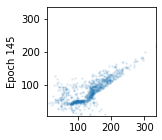

Reconstruction:


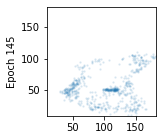

Epoch 146 elbo -9.072406


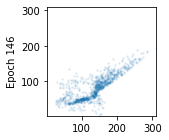

Reconstruction:


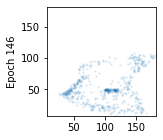

Epoch 147 elbo -8.808874


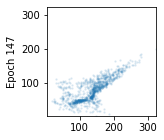

Reconstruction:


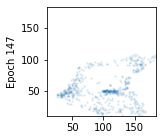

Epoch 148 elbo -9.0666


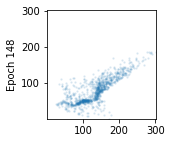

Reconstruction:


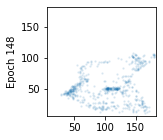

Epoch 149 elbo -8.955052


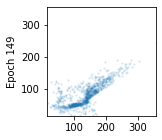

Reconstruction:


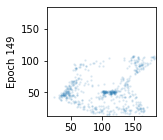

Epoch 150 elbo -8.88064


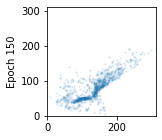

Reconstruction:


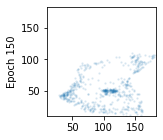

Epoch 151 elbo -8.922567


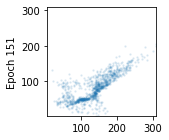

Reconstruction:


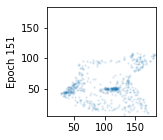

Epoch 152 elbo -8.821808


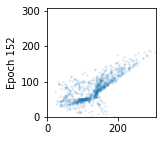

Reconstruction:


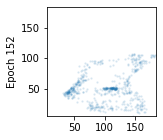

Epoch 153 elbo -9.131121


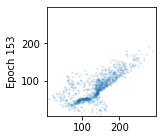

Reconstruction:


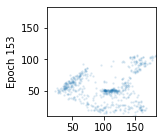

Epoch 154 elbo -8.87466


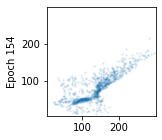

Reconstruction:


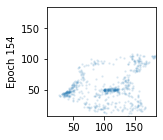

Epoch 155 elbo -8.757943


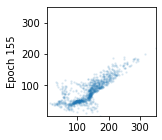

Reconstruction:


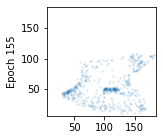

Epoch 156 elbo -8.792145


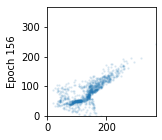

Reconstruction:


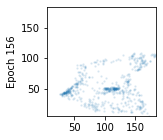

Epoch 157 elbo -8.837843


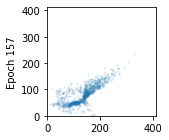

Reconstruction:


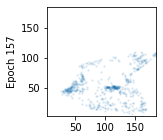

Epoch 158 elbo -8.872079


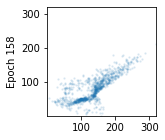

Reconstruction:


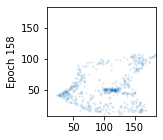

Epoch 159 elbo -8.631144


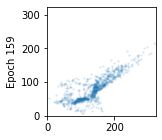

Reconstruction:


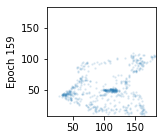

Epoch 160 elbo -8.794281


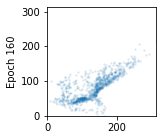

Reconstruction:


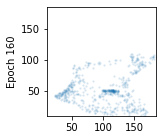

Epoch 161 elbo -8.895471


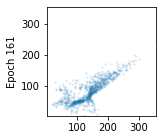

Reconstruction:


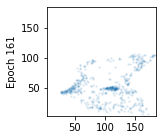

Epoch 162 elbo -8.841019


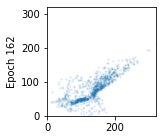

Reconstruction:


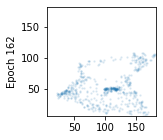

Epoch 163 elbo -8.74097


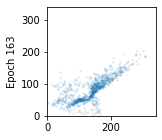

Reconstruction:


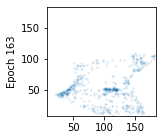

Epoch 164 elbo -8.795905


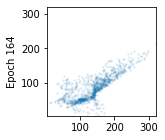

Reconstruction:


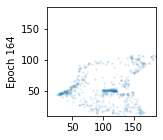

Epoch 165 elbo -8.850311


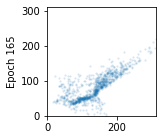

Reconstruction:


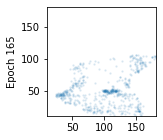

Epoch 166 elbo -8.767736


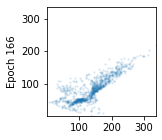

Reconstruction:


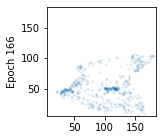

Epoch 167 elbo -8.700431


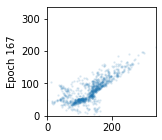

Reconstruction:


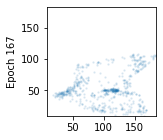

Epoch 168 elbo -8.765588


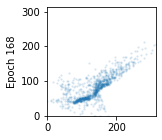

Reconstruction:


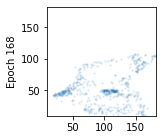

Epoch 169 elbo -8.863292


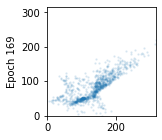

Reconstruction:


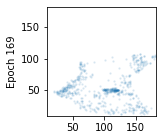

Epoch 170 elbo -8.780947


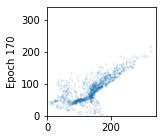

Reconstruction:


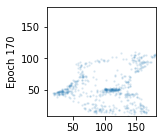

Epoch 171 elbo -8.690913


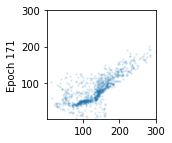

Reconstruction:


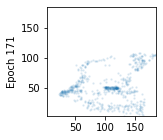

Epoch 172 elbo -8.715757


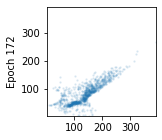

Reconstruction:


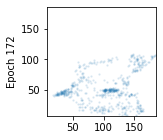

Epoch 173 elbo -8.721562


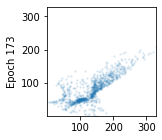

Reconstruction:


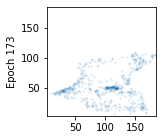

Epoch 174 elbo -8.888743


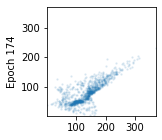

Reconstruction:


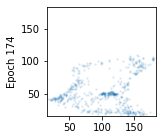

Epoch 175 elbo -8.661799


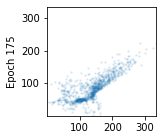

Reconstruction:


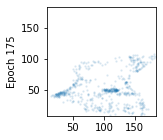

Epoch 176 elbo -8.770503


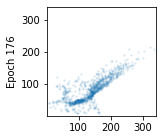

Reconstruction:


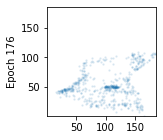

Epoch 177 elbo -8.586723


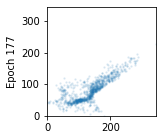

Reconstruction:


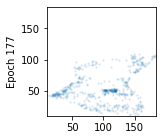

Epoch 178 elbo -8.640466


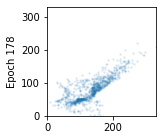

Reconstruction:


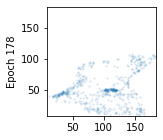

Epoch 179 elbo -8.552917


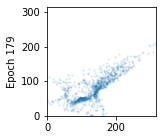

Reconstruction:


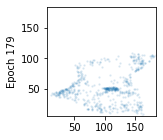

Epoch 180 elbo -9.196881


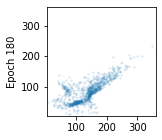

Reconstruction:


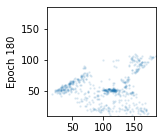

Epoch 181 elbo -8.696353


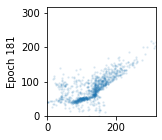

Reconstruction:


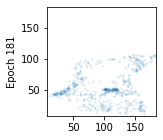

Epoch 182 elbo -8.557448


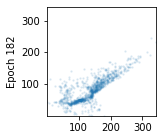

Reconstruction:


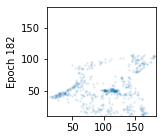

Epoch 183 elbo -8.71512


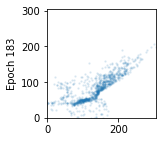

Reconstruction:


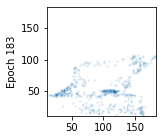

Epoch 184 elbo -8.572496


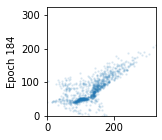

Reconstruction:


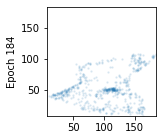

Epoch 185 elbo -8.690372


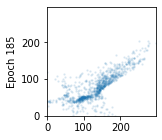

Reconstruction:


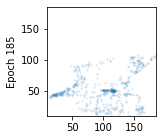

Epoch 186 elbo -8.846362


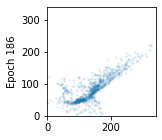

Reconstruction:


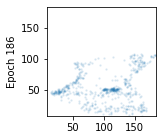

Epoch 187 elbo -8.653486


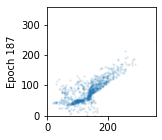

Reconstruction:


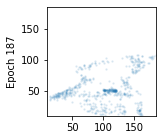

Epoch 188 elbo -8.5539


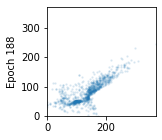

Reconstruction:


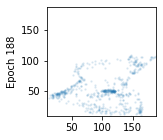

Epoch 189 elbo -8.656655


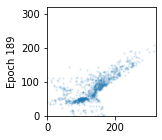

Reconstruction:


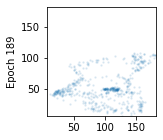

Epoch 190 elbo -8.525915


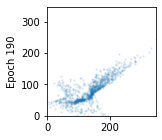

Reconstruction:


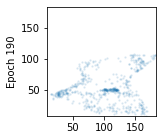

Epoch 191 elbo -8.65951


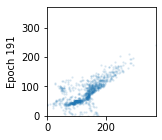

Reconstruction:


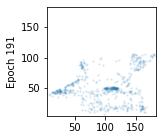

Epoch 192 elbo -8.543742


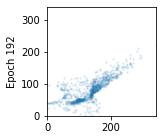

Reconstruction:


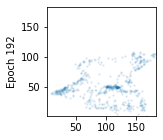

Epoch 193 elbo -8.723514


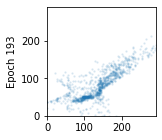

Reconstruction:


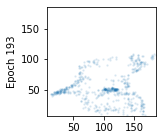

Epoch 194 elbo -8.507085


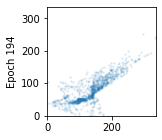

Reconstruction:


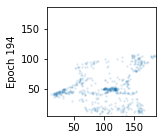

Epoch 195 elbo -8.637493


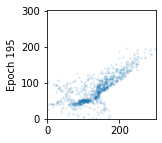

Reconstruction:


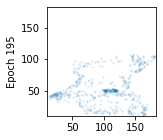

Epoch 196 elbo -8.497084


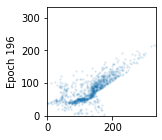

Reconstruction:


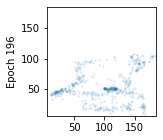

Epoch 197 elbo -8.531872


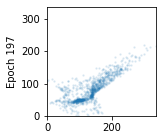

Reconstruction:


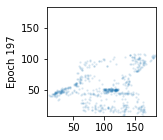

Epoch 198 elbo -8.736054


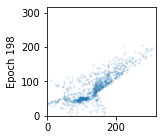

Reconstruction:


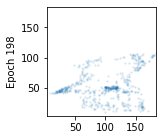

Epoch 199 elbo -8.469363


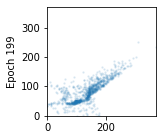

Reconstruction:


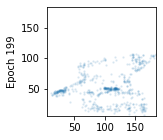

Epoch 200 elbo -8.447752


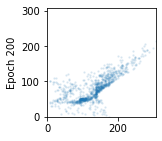

Reconstruction:


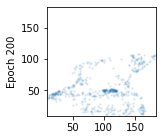

Epoch 201 elbo -9.034973


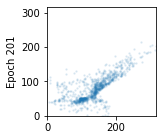

Reconstruction:


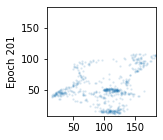

Epoch 202 elbo -8.567975


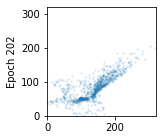

Reconstruction:


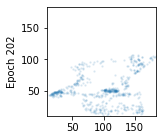

Epoch 203 elbo -8.618424


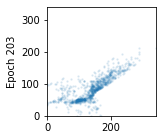

Reconstruction:


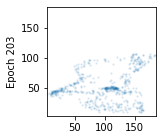

Epoch 204 elbo -8.573846


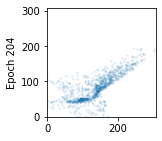

Reconstruction:


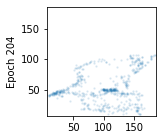

Epoch 205 elbo -8.56455


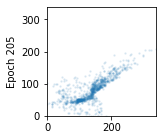

Reconstruction:


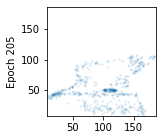

Epoch 206 elbo -9.1839485


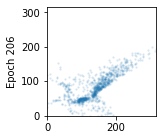

Reconstruction:


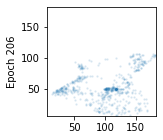

Epoch 207 elbo -8.714409


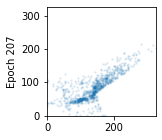

Reconstruction:


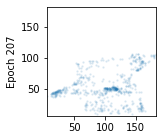

Epoch 208 elbo -8.451581


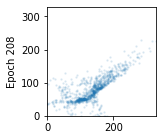

Reconstruction:


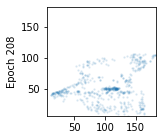

Epoch 209 elbo -8.573358


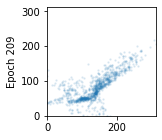

Reconstruction:


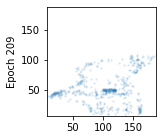

Epoch 210 elbo -8.579988


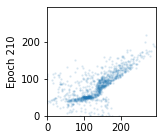

Reconstruction:


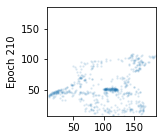

Epoch 211 elbo -8.753623


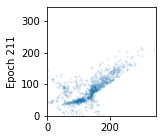

Reconstruction:


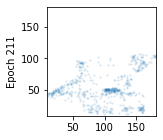

Epoch 212 elbo -8.491243


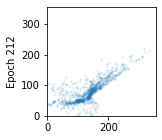

Reconstruction:


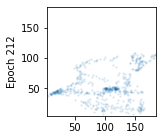

Epoch 213 elbo -9.8356085


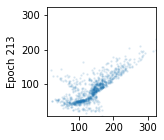

Reconstruction:


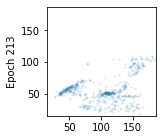

Epoch 214 elbo -9.192701


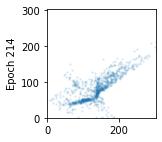

Reconstruction:


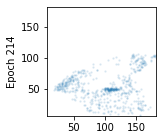

Epoch 215 elbo -9.030109


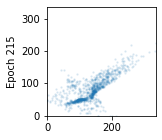

Reconstruction:


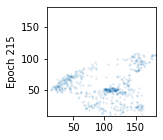

Epoch 216 elbo -8.977805


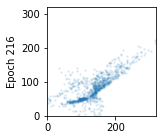

Reconstruction:


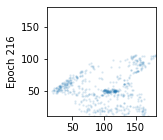

Epoch 217 elbo -8.914634


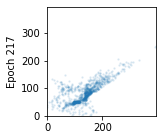

Reconstruction:


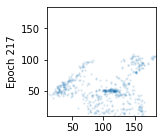

Epoch 218 elbo -8.768474


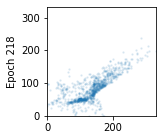

Reconstruction:


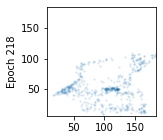

Epoch 219 elbo -8.6806


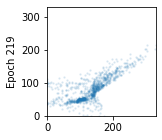

Reconstruction:


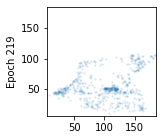

Epoch 220 elbo -8.859053


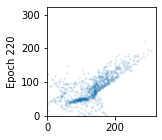

Reconstruction:


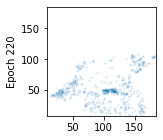

Epoch 221 elbo -8.668433


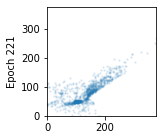

Reconstruction:


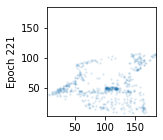

Epoch 222 elbo -8.545241


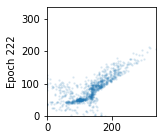

Reconstruction:


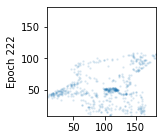

Epoch 223 elbo -8.546795


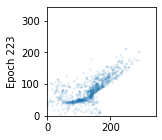

Reconstruction:


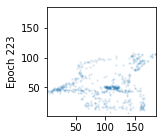

Epoch 224 elbo -8.628208


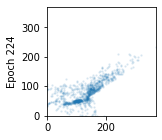

Reconstruction:


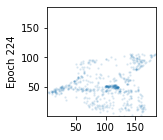

Epoch 225 elbo -8.62735


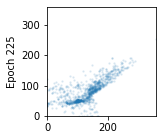

Reconstruction:


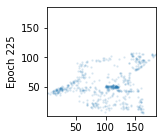

Epoch 226 elbo -8.551898


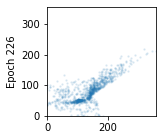

Reconstruction:


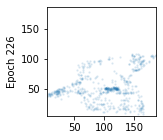

Epoch 227 elbo -8.662586


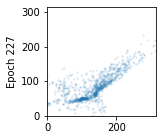

Reconstruction:


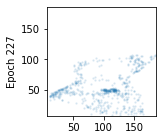

Epoch 228 elbo -8.761581


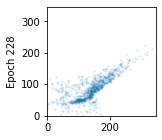

Reconstruction:


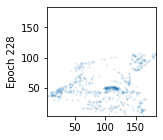

Epoch 229 elbo -8.434142


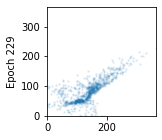

Reconstruction:


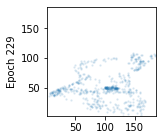

Epoch 230 elbo -8.496936


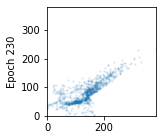

Reconstruction:


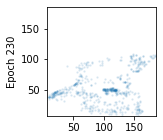

KeyboardInterrupt: 

In [6]:
samples, _ = make_decoder(prior.sample(1000), [2])
s1_5k, _ = make_decoder(prior.sample(1500), [2])
s2k, _ = make_decoder(prior.sample(2000), [2])
s3k, _ = make_decoder(prior.sample(3000), [2])
s5k, _ = make_decoder(prior.sample(5000), [2])
s10k, _ = make_decoder(prior.sample(10000), [2])

t1_5k = None
t2k = None
t3k = None
t5k = None
t10k = None

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(5000):
        test_elbo, test_codes, test_samples, test_loc, t1_5k, t2k, t3k, t5k, t10k = sess.run([elbo, code, samples, loc, s1_5k, s2k, s3k, s5k, s10k], {data: X_test})
        print('Epoch', epoch, 'elbo', test_elbo)
        plot(epoch, test_samples, size=2)
        print('Reconstruction:')
        plot(epoch, test_loc, size=2)
        for _ in range(600):
            indices = np.random.choice(X_train.shape[0], 128)
            batch = X_train[indices]
            sess.run(optimize, {data: batch})

In [7]:
def people_in_area(samples):
    in_area = []
    for sample in samples:
        x = sample[0]
        y = sample[1]
        if x > 130 and x < 150 and y > 50 and y < 70: in_area.append(sample)
    print(len(in_area))

people_in_area(test_samples)
people_in_area(t1_5k)
people_in_area(t2k)
people_in_area(t3k)
people_in_area(t5k)
people_in_area(t10k)

63
88
147
179
309
597
